# **Assignment:**

 **Scenario:
You are working as a data scientist for a healthcare analytics company. You have been
provided with a dataset containing anonymized patient data. Your task is to clean the data,
visualize it, analyze statistical relationships, and simulate a basic health-related system
using First Order ODEs**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy.integrate import odeint as od
from scipy.integrate import solve_ivp as s_ivp
from statsmodels.stats import weightstats as st
from scipy.stats import norm
import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/patient_data.csv')

In [ ]:
df.head()

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High


# **Q1. Outlier Detection and Feature Reduction**

- Use VarianceThreshold to remove constant features (if any).



In [ ]:
df1 = df.copy()

In [ ]:
label_en = LabelEncoder()


In [ ]:
df1['Gender'] = df1['Gender'].map({'Female': 0, 'Male': 1})

In [ ]:
df1['Region'] = df1['Region'].map({'East': 0, 'West': 1, 'South':2, 'North':3})

In [ ]:
X = df1.drop('RiskCategory', axis=1)
y = df1['RiskCategory']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
v_thre =VarianceThreshold(threshold=0)
v_thre.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
cons_col = [column for column in X_train.columns if column not in X_train.columns[v_thre.get_support()]]

In [ ]:
features = X_train.drop(cons_col,axis=1)

In [ ]:
features

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region
43,44,0,70,157.9,95.8,0
62,63,1,67,151.8,127.6,1
3,4,1,53,184.5,127.2,1
71,72,0,46,210.4,133.8,1
45,46,0,27,265.7,136.3,2
...,...,...,...,...,...,...
96,97,0,68,200.4,123.0,3
67,68,1,54,160.4,110.2,1
64,65,1,42,207.8,102.0,3
47,48,1,54,183.0,103.8,2


- Detect and remove outliers from CholesterolLevel using any method of choice.

In [ ]:
Q1 = df1['CholesterolLevel'].quantile(0.25)
Q3 = df1['CholesterolLevel'].quantile(0.75)
IQR = Q3 - Q1

low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

outlier = df1[(df1['CholesterolLevel'] >= low) & (df1['CholesterolLevel'] <= high)]

In [ ]:
outlier

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,1,37,193.4,129.4,0,High
1,2,0,45,210.7,107.1,1,Low
2,3,1,63,244.3,103.9,1,Low
3,4,1,53,184.5,127.2,1,High
4,5,1,29,175.7,116.6,2,High
...,...,...,...,...,...,...,...
94,95,0,51,208.3,105.3,0,Low
95,96,0,58,224.8,126.9,0,High
96,97,0,68,200.4,123.0,3,Medium
97,98,0,71,243.6,111.0,1,Low


- Replace any missing values.

In [ ]:
df1 = df1.fillna(df1.mean(numeric_only=True))

# **Q2: Data Visualization (2 Marks)**

- Generate a box plot comparing BloodPressure between different RiskCategory levels.


<Axes: xlabel='RiskCategory', ylabel='BloodPressure'>

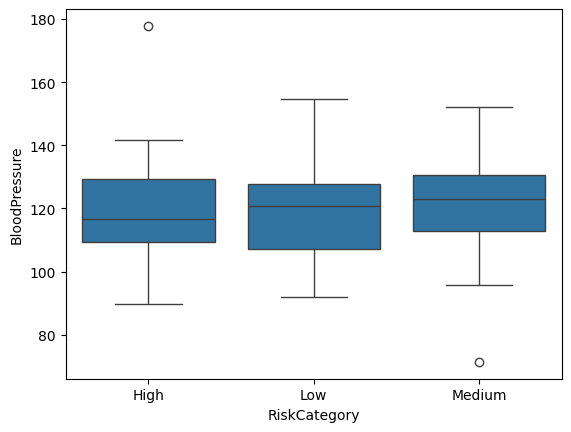

In [ ]:
sns.boxplot(x='RiskCategory',y='BloodPressure',data=df1)

<Axes: xlabel='Region', ylabel='count'>

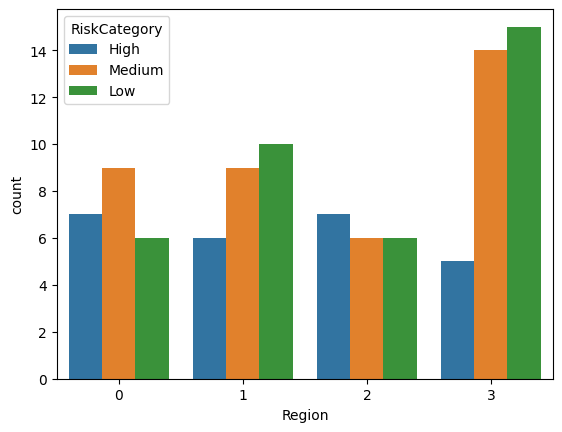

In [ ]:
sns.countplot(x='Region',hue='RiskCategory',data=df1)

# **Q3: Statistical Hypothesis Testing (3 Marks)**

Perform the following

- Is the average CholesterolLevel significantly different from 200 mg/dL having a sample
size of 20?

In [ ]:
df3 = df.copy()

In [12]:
df_population = df3['CholesterolLevel']

In [13]:
df_population.mean()

np.float64(201.77699999999996)

In [17]:
sample = np.random.choice(df_population,20)
sample

array([153.5, 177.4, 239.2, 215.7, 189.7, 205.5, 188.2, 194.2, 242.1,
       229.1, 207.7, 151.8, 173.3, 195.2, 157.5, 195.2, 243.6, 175.4,
       256.9, 234.3])

In [18]:
ztest, p_value = st.ztest(sample,value=202)

In [19]:
if p_value < 0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Accept Null Hypothesis


In [20]:
alpha = 0.05
z_critical = norm.ppf(1 - alpha/2)

In [21]:
if ztest > z_critical and ztest < -z_critical:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Accept Null Hypothesis


- Is there a significant relationship between Region and RiskCategory?

In [24]:
data = pd.crosstab(df3['Region'],df3['RiskCategory'])
data

RiskCategory,High,Low,Medium
Region,,,
East,7,6,9
North,5,15,14
South,7,6,6
West,6,10,9


In [26]:
Observed_values = data.values
Observed_values

array([[ 7,  6,  9],
       [ 5, 15, 14],
       [ 7,  6,  6],
       [ 6, 10,  9]])

In [29]:
chi2, p_val, dof, expected_val = stats.chi2_contingency(data)

In [30]:
if p_val < 0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Accept Null Hypothesis


In [31]:
chi2_critical = stats.chi2.ppf(1 - alpha, dof)

In [32]:
if chi2 > chi2_critical and chi2 < -chi2_critical:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Accept Null Hypothesis


# **Q4: Modeling a Health System with ODE (3 Marks)**

Model the progression of a patient's medication in the bloodstream.
Equation:
 dC/dt = k(D - C)
Where:
- k = 0.1, D = 100, C(0) = 0
- Solve this ODE for t = 0 to 50 using both odeint and solve_ivp
- Plot the result and explain the difference in output between the two solvers, if any.

In [ ]:
def dCdt(C, t, k, D):
    return k * (D - C)

In [ ]:
k, D, C0 = 0.1, 100, 0
S = (k, D, C0)

In [ ]:
t = np.linspace(0, 50, 100)

In [ ]:
sol_od = od(dCdt, y0=S, t=t,args=(k, D))

In [ ]:
sol_ivp = s_ivp(dCdt, t_span=(0, max(t)), y0=S, args=(k, D))

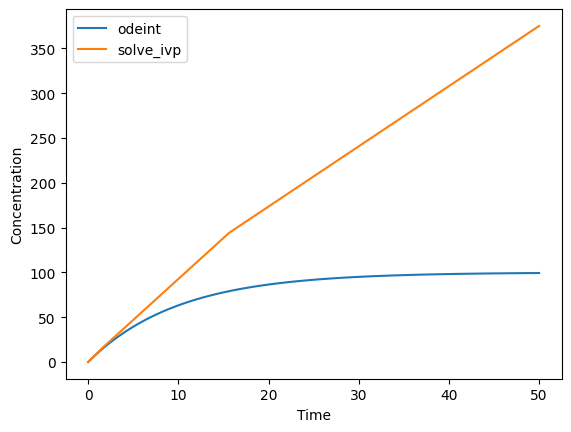

In [ ]:
plt.plot(t, sol_od.T[0], label='odeint')
plt.plot(sol_ivp.t, sol_ivp.y[0], label='solve_ivp')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

- Blue Line (odeint):
Shows a smooth curve that rises quickly at first, then slows down and flattens out.
This is a realistic behavior — as more medicine builds up, the body absorbs it more slowly.

- Orange Line (solve_ivp):
Goes up in a straight line and keeps increasing, even beyond the expected limit.
This is not realistic — it's a mistake.